### Benchmarking

In [1]:
import pandas as pd
from benchmarking.utils import store_dataframes
from benchmarking.models import evaluate_modularprophet

from modularprophet.compositions import Additive, Stationary
from modularprophet.components import Trend
from modularprophet.containers import Sequential
from modularprophet.modules.ar_net import LaggedNet
from modularprophet.modules.seasonality import FourierSeasonality

In [2]:
n_forecasts = 10
n_lags = 10

default = {
        "dataset": "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/air_passengers.csv",
        "n_forecasts": n_forecasts, 
        "step_size": 1,
        "holdout": 44,
        "seasonal_cycle": 12,
}

configs = {
    "ModularProphet": [{
         "n_lags": n_lags,
         "model": Additive(
                Trend(),
                FourierSeasonality("yearly", period=365.25, series_order=5, growth="linear"),
                LaggedNet(n_lags=n_lags)
            ),
        "constraint": "zeromean"
    }],
}

In [5]:
n_forecasts = 288
n_lags = 576

default = {
        "dataset": "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/yosemite_temps.csv",
        "n_forecasts": n_forecasts, 
        "step_size": n_forecasts,
        "holdout": 3744,
        "seasonal_cycle": 288,
}

configs = {
    "ModularProphet": [{
         "n_lags": n_lags,
         "model": Stationary(
                Trend(),
                FourierSeasonality("yearly", period=1, series_order=5, growth="linear"),
                LaggedNet(n_lags=n_lags)
            ),
        "constraint": "incremental"
    }],
}

In [3]:
metrics = pd.DataFrame()
predictions = pd.DataFrame()
components = pd.DataFrame()

for key, value in configs.items():
    if key == "ModularProphet":
        for config in value:
            config.update(default)
            metrics_df, predictions_df, components_df = evaluate_modularprophet(**config)
            metrics_df["model"] = "ModularProphet"
            predictions_df.columns = [f"ModularProphet({c})" for c in list(predictions_df.columns)]
            metrics = pd.concat([metrics, metrics_df])
            predictions = pd.concat([predictions, predictions_df], axis=1)
            components = pd.concat([components, components_df], axis=1)
            store_dataframes(metrics, predictions, components, config["dataset"], "ModularProphet")

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/karl/git/idic/venv/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

  | Name  | Type     | Params
-----------------------------------
0 | model | Additive | 114   
-----------------------------------
114       Trainable params
0         Non-trainable params
114       Total params
0.000     Total estimated model params size (MB)
/Users/karl/git/idic/venv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoade

In [4]:
components = pd.read_csv("benchmarking/air_passengers/ModularProphet_components.csv")[:-1]
components.agg(["mean", "std"]).round(3)

,Trend,FourierSeasonality,LaggedNet
mean,-1.179216e+12,-2.291474e+29,-2.291474e+29
std,1.630670e+10,1.515853e+29,1.515853e+29


<Axes: >

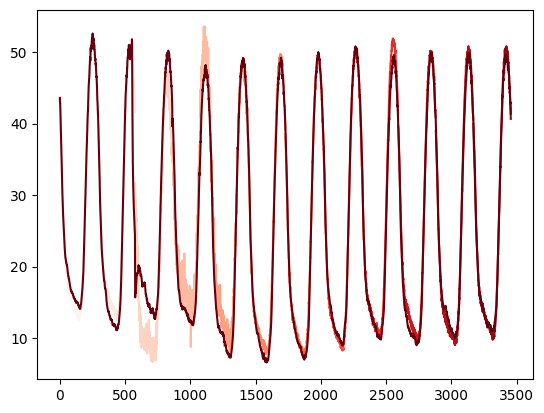

In [22]:
predictions = pd.read_csv("benchmarking/yosemite_temps/ModularProphet_predictions.csv")[:-1]
df = pd.read_csv(default["dataset"]).tail(len(predictions))
predictions["y"] = df["y"].values
predictions.plot(colormap="Reds", legend=False)

In [ ]:
pd.read_csv("benchmarking/yosemite_temps/ModularProphet_metrics.csv").plot(kind="bar")

In [ ]:
pd.read_csv("benchmarking/yosemite_temps/ModularProphet_metrics.csv")